In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 __Importing data file__

In [4]:
df = pd.read_csv("general_data.csv")

In [12]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.info() #checking information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

# __Data Cleaning__

__1. Finding Null values__

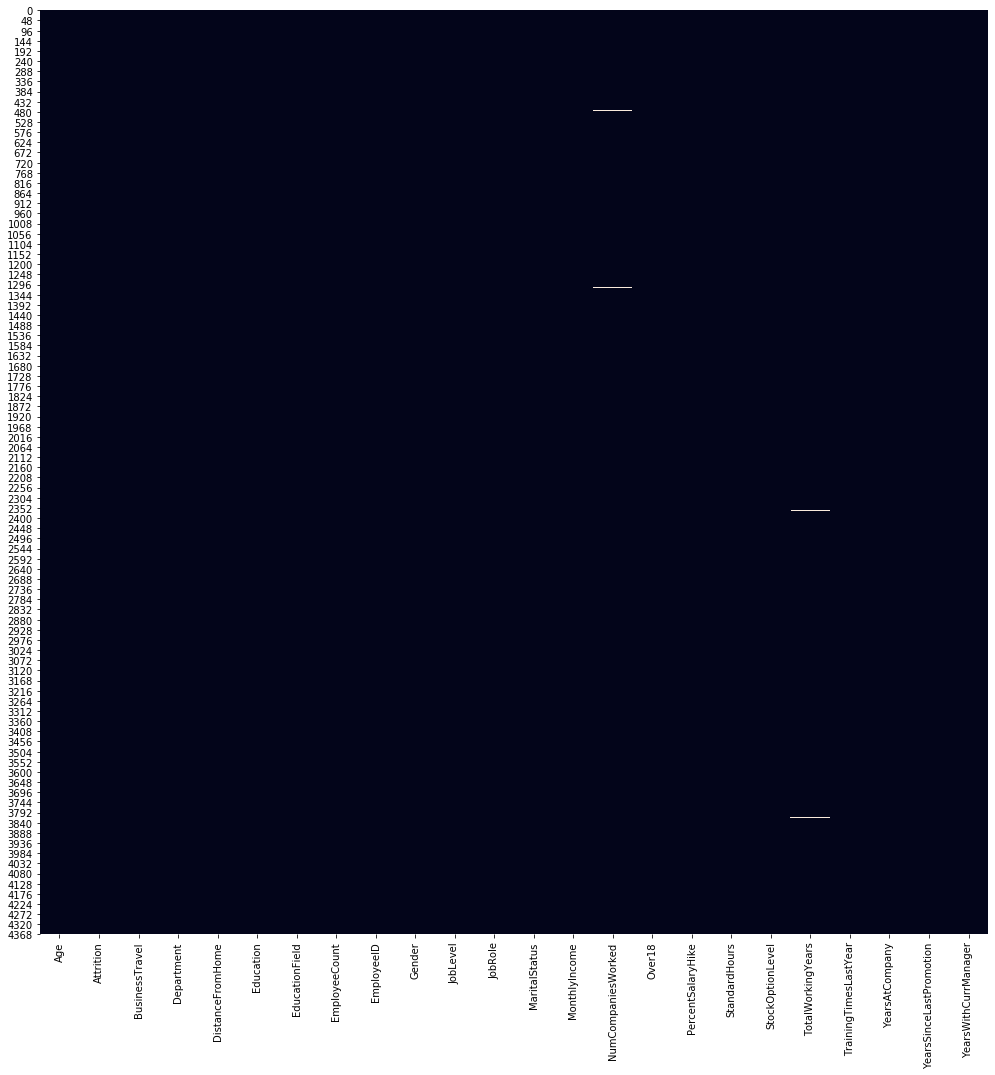

In [5]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False)

__As you can see above, there are a few null values in columns 'NumberOfCompaniesWorked' and 'TotalWorkingYears'__

__Inorder to tackle this, lets replace these values with the median value of that column__

In [6]:
lst=df.columns[df.isna().any()].tolist()
for i in lst:
    df[i]=df[i].replace(np.nan,df[i].median())

__Visualization after replacing Null values.__

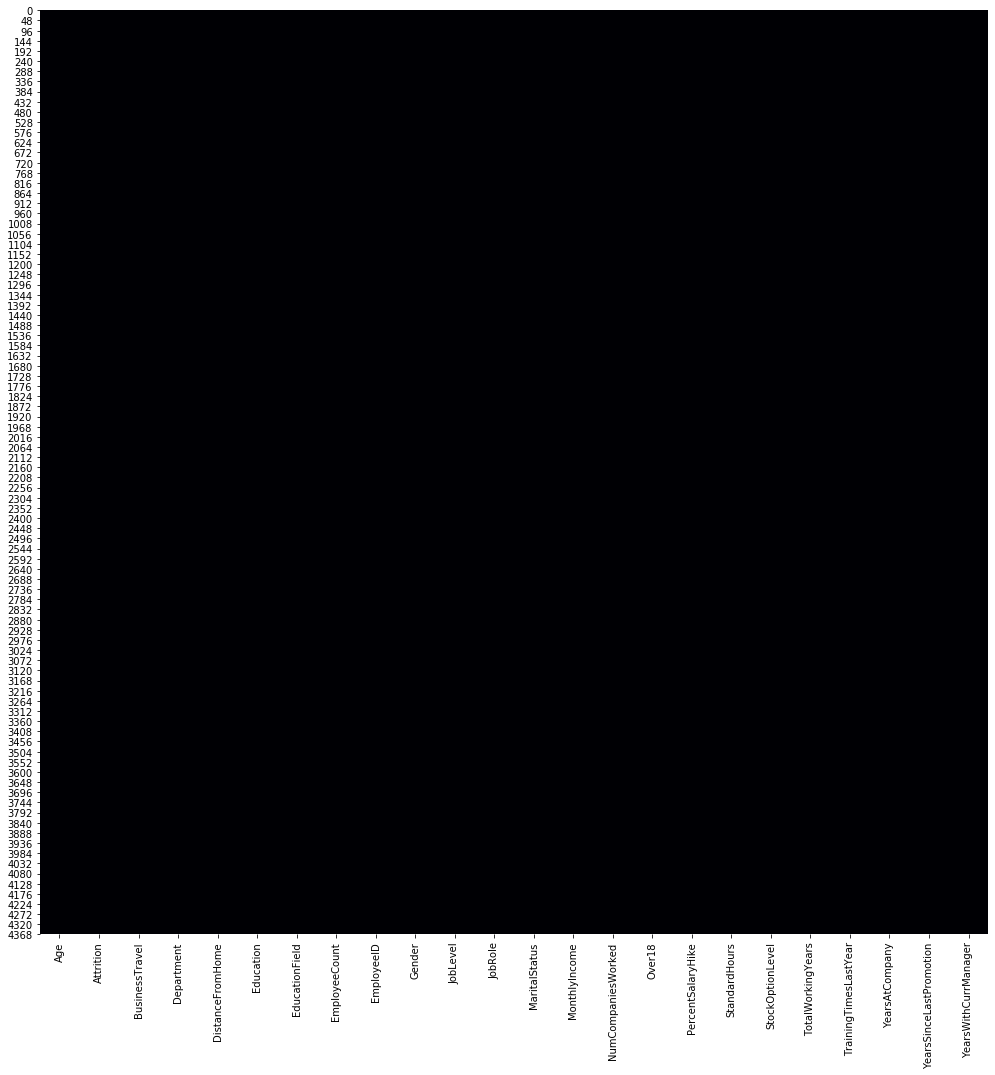

In [8]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False,cmap='magma')

__Deleting redundant columns.__ 

In [13]:
df.drop(['EmployeeCount','Over18','StandardHours','StockOptionLevel'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# __Data Visualization__

__Since one of our goals is to predict the chance of Attrition, let's take a look on how the different variables correlate with it.__

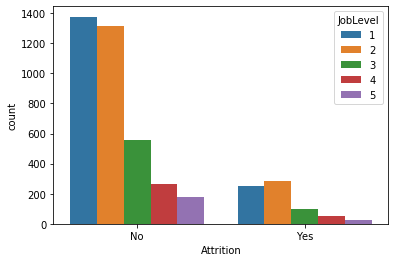

In [9]:
sns.countplot('Attrition',data=df,hue='JobLevel')

__The above visualization shows attrition count for different job levels.__

No     0.84
Yes    0.16
Name: Attrition, dtype: float64


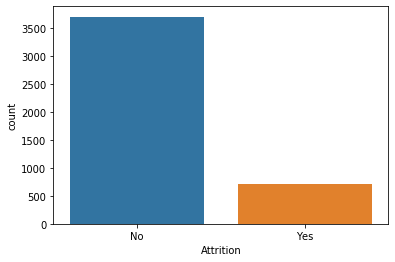

In [49]:
print(round(df['Attrition'].value_counts(normalize = True),2))
sns.countplot(x='Attrition',data=df)

__Around 16% of the employees have left the company__

In [16]:
emp_df = pd.read_csv("employee_survey_data.csv")
emp_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


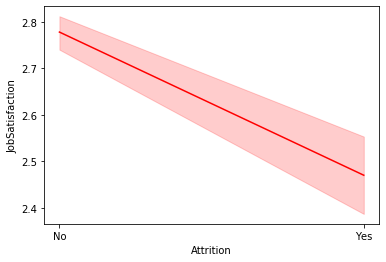

In [17]:
sns.lineplot(df['Attrition'],emp_df['JobSatisfaction'],color='Red')

__It's clear that the employees with less job satisfaction leave/change the company.__

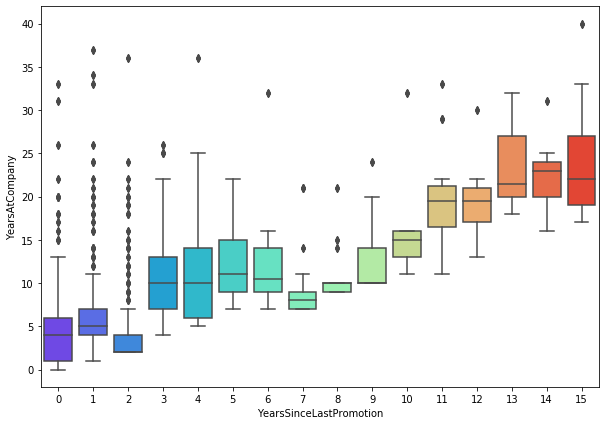

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x="YearsSinceLastPromotion", y="YearsAtCompany", data=df,palette='rainbow')

__As you spend more time in the company, your frequency of promotion decreases.__

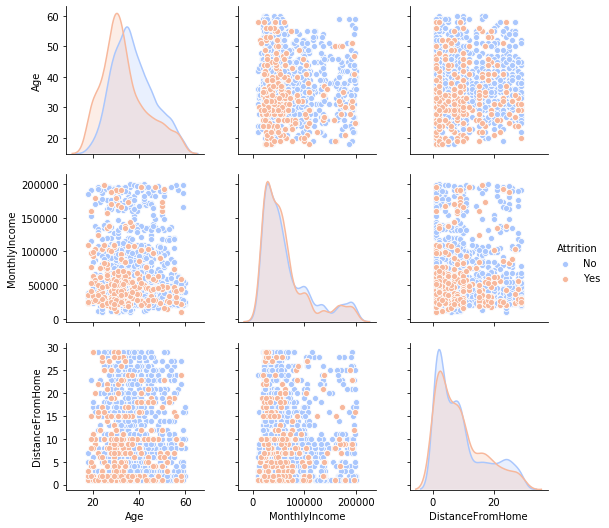

In [50]:
sns.pairplot(df[['Age','MonthlyIncome','DistanceFromHome','Attrition']],hue = 'Attrition',palette='coolwarm',kind='scatter')

__The above pairplot displays relation between different columns of the data. Employees with low salary attrit more.__

The youngest employee is 18 years old.

The oldest employee is 60 years old.


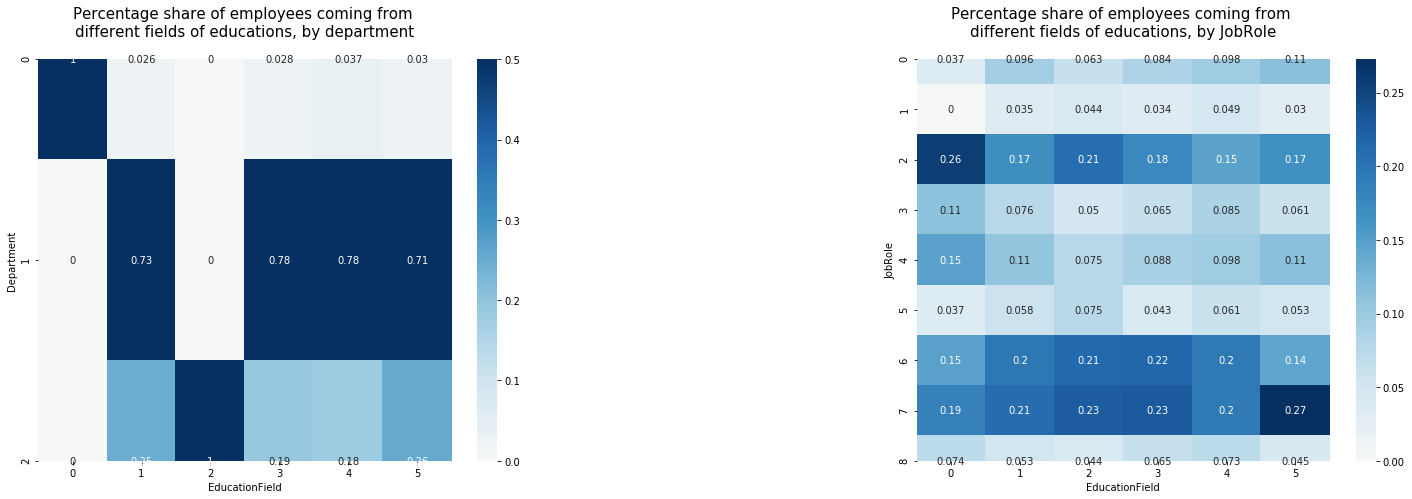

In [166]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(top=0.85, wspace=0.7,hspace = 0.6)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Percentage share of employees coming from \ndifferent fields of educations, by department\n",size=15)
sns.heatmap(pd.crosstab(df.Department, df.EducationField, normalize = 'columns'),cmap="RdBu",vmax=0.5, annot=True, cbar=True, center=0,cbar_kws={"shrink":1})



ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Percentage share of employees coming from \ndifferent fields of educations, by JobRole\n",size=15)
sns.heatmap(pd.crosstab(df.JobRole, df.EducationField, normalize = 'columns'),cmap="RdBu", annot=True, cbar=True, center=0,cbar_kws={"shrink":1})

__Correlation factors between all the columns__

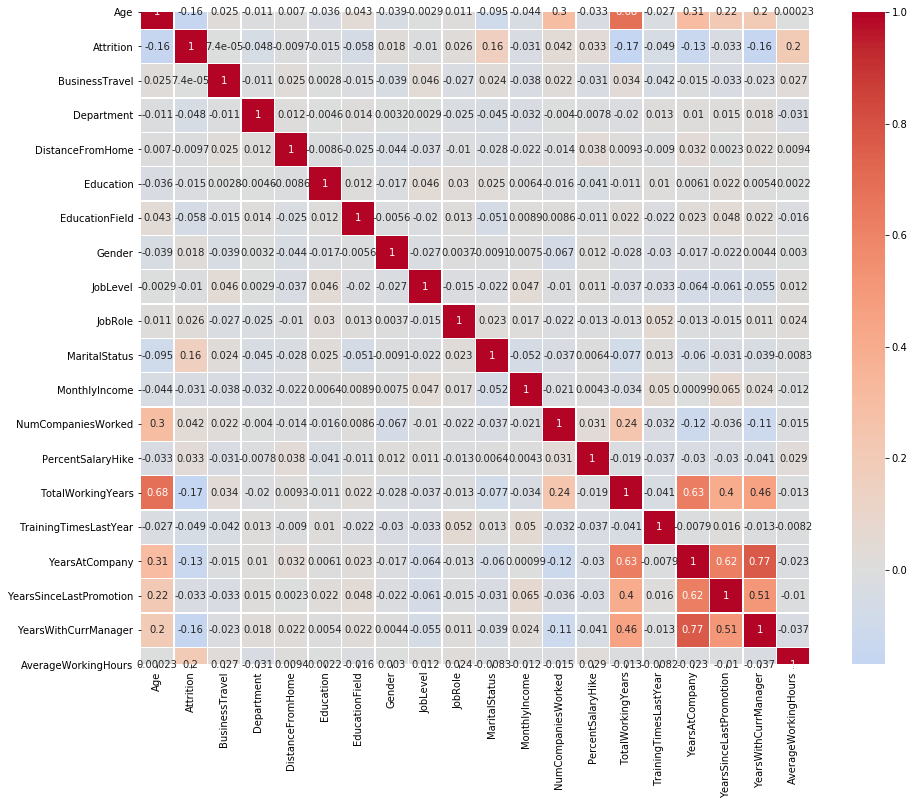

In [157]:
plt.subplots(figsize=(15, 12))
#ax.set_ylim(4410, -0.5)
#plt.subplot.bottom : 0.15
sns.heatmap(df.corr(), annot = True,cmap='coolwarm',center=0,cbar_kws={"shrink":1},linewidths=0.5).autolayout : True

__Attrition rate by Marital Status:__

Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


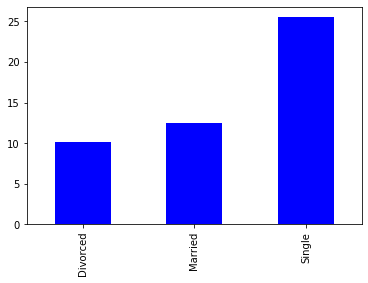

In [58]:
print(round(df['MaritalStatus'][df['Attrition'] == 'Yes'].value_counts()/df['MaritalStatus'].value_counts()*100,2))
(df['MaritalStatus'][df['Attrition'] == 'Yes'].value_counts()/df['MaritalStatus'].value_counts()*100).plot.bar(color = 'blue')

In [67]:
emp_man_sur = pd.read_csv("manager_survey_data.csv") # manager survey data
emp_in_time = pd.read_csv("in_time.csv") # login time data
emp_out_time = pd.read_csv("out_time.csv") # logout time data

# data_dictionary as a bonus:
emp_desc = pd.read_excel("data_dictionary.xlsx")

#assigning names to each data frame:

emp_df.name = 'Employee Survey data'
df.name = 'General data'
emp_in_time.name = 'Log in time data'
emp_out_time.name = 'Log out time data'
emp_man_sur.name = 'Manager Survey data'

In [68]:
gen_and_surveys = [df,emp_df,emp_man_sur]  # list of 3 'main' datasets (general + surveys).
log_time = [emp_in_time, emp_out_time]

__Correlating Frequency of travels and  attirition rate.__

In [70]:
print(round(df['BusinessTravel'].value_counts(normalize = True)*100,2))
print("\nAttrition rate")
print(round(df['BusinessTravel'][df['Attrition'] == 'Yes'].value_counts()/df['BusinessTravel'].value_counts()*100,2))

Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: BusinessTravel, dtype: float64

Attrition rate
Travel_Rarely        14.96
Travel_Frequently    24.91
Non-Travel            8.00
Name: BusinessTravel, dtype: float64


__We want to compute employees average working hours. Inorder to do so, we need to query the dataset log_time.__

__To join the datasets on index, let's replace our unnamed columns in the dataset with "EmployeeID"__

In [71]:
for dataset in log_time:
    dataset.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

__Now in all 5 datasets we have common 'EmployeeID' column containing 4410 unique values.__

In [72]:
for dataset in log_time:
    dataset.set_index('EmployeeID', inplace=True)

for dataset in gen_and_surveys:
    dataset.set_index('EmployeeID', inplace=True)

__Transposing dataframes to perform calculations:__

In [73]:
emp_out_time_transposed = emp_out_time.T
emp_in_time_transposed = emp_in_time.T

__Re-formatting the indexes and variables__

In [74]:
emp_out_time_transposed.index = pd.to_datetime(emp_out_time_transposed.index)
emp_in_time_transposed.index = pd.to_datetime(emp_in_time_transposed.index)

emp_out_time_transposed = emp_out_time_transposed.apply(pd.to_datetime)
emp_in_time_transposed = emp_in_time_transposed.apply(pd.to_datetime)

__Subtracting the values of out time and in time to find the working hours.__

In [75]:
work_time =  emp_out_time_transposed.sub(emp_in_time_transposed)

__Computing a new column named 'AverageWorkingHours' which has the average working time.__

__The average working time is calculated by converting time into hours from milli-seconds.__

In [77]:
df['AverageWorkingHours']=round((pd.to_numeric(work_time.mean())/3600000000000),2)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageWorkingHours
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0,7.38
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4,7.73
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,2,5,0,3,7.02
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,5,8,7,5,7.20
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,2,6,0,4,8.01


__Visualizing a joinplot between Averag working hours and percent hike and salary.__

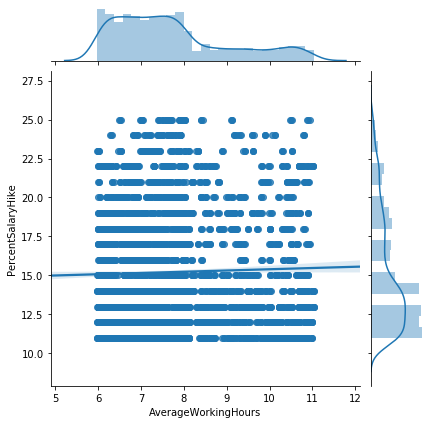

In [79]:
sns.jointplot(x='AverageWorkingHours',y='PercentSalaryHike',data=df,kind='reg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

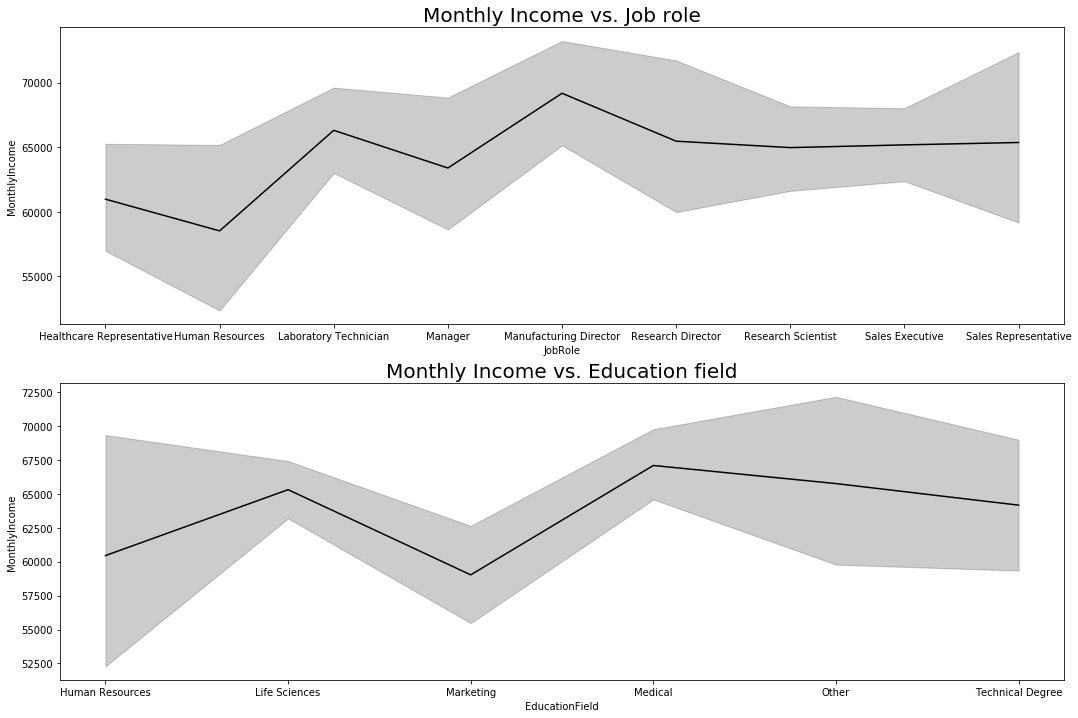

In [89]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.title("Monthly Income vs. Job role",size=20)
sns.lineplot(y='MonthlyIncome',x='JobRole',data=df,color='black')
plt.subplot(2,1,2)
plt.title("Monthly Income vs. Education field",size=20)
sns.lineplot(y='MonthlyIncome',x='EducationField',data=df,color='black')
plt.tight_layout

__From the above plots, it is evident that an employee with job role as manufacturing director or education field as medical gets the highest salary whereas, an employee with job role as HR or education field as marketing gets the lowest salary.__

# __Machine Learning__

The end goal is to determine if an employee will leave the company or not. Therefore, this is a classification case. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

1)Logistic Regression

2)Decision Tree Classification

3)Random Forest Classification

__Following code converts columns from string values to integer values for purpose of fitting data in machine learning__

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()

'''Identifying the columns with string'''
df_num = df.select_dtypes(exclude=[np.number])
lst=list(df_num.columns)

'''Converting those columns to integer values'''
for i in lst:
    df[i]=label_encoder_y.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageWorkingHours
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,1.0,6,1,0,0,7.38
2,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,6.0,3,5,1,4,7.73
3,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,5.0,2,5,0,3,7.02
4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,13.0,5,8,7,5,7.20
5,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,9.0,2,6,0,4,8.01


# __Logistic Regression__

In [93]:
y = df['Attrition']
X= df.drop('Attrition', axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=44)

In [94]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [159]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state = 44)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("The accuracy score is: ", format(accuracy_score(y_test,y_pred),".2f"))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_test,y_pred))

The accuracy score is:  0.85
 
Confusion matrix:  
 [[1462   31]
 [ 229   42]]


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1493
           1       0.58      0.15      0.24       271

    accuracy                           0.85      1764
   macro avg       0.72      0.57      0.58      1764
weighted avg       0.82      0.85      0.81      1764



__The model predicts 73 cases of attrition, out of which 42 employees actually have left the company. There are 31 false positives, what gives us precision score = 0.58.__

__Our model didn't catch 229 of employees who actually left the company, and the recall score = 0.15.__

# Random Forest Classifier

In [170]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0)
RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
RF_model_score = (format(RF_model.score(X_test, y_test),".2f"))
print("The accuracy score using Random Forest Classifier is: ",RF_model_score)

The accuracy score using Random Forest Classifier is:  0.86


In [171]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1493
           1       0.96      0.09      0.17       271

    accuracy                           0.86      1764
   macro avg       0.91      0.55      0.55      1764
weighted avg       0.87      0.86      0.81      1764



# Decision Tree Classifier

In [172]:
dec_tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
dec_tree_model.fit(X_train, y_train)
y_predict = dec_tree_model.predict(X_test)
dec_tree_model_score = format(dec_tree_model.score(X_test, y_test))
print("The accuracy score using Decision Tree Classifier is: ",dec_tree_model_score)

The accuracy score using Decision Tree Classifier is:  0.8503401360544217


In [173]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1493
           1       0.54      0.17      0.26       271

    accuracy                           0.85      1764
   macro avg       0.70      0.57      0.59      1764
weighted avg       0.82      0.85      0.82      1764



__Since all the models give us a similar accuracy of 85, we will use Random Forest Classifier to predict the attrition for a sample employee.__

In [132]:
RF_model.predict([[24,1,3,17,5,1,1,3,4,0,180000,1.0,7,5.0,2,3,1,0,8.00]])

array([0])

In [155]:
dec_tree_model.predict([[31,1,1,10,1,1,0,1,6,2,10000,0.0,23,6.0,3,5,1,4,7.73]])

array([0])